In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import neighbors, metrics, grid_search, cross_validation, feature_selection, linear_model

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
def read_dataset():
    return pd.read_csv(os.path.join('datasets', 'auto-mpg.csv'))

df = read_dataset()

In [3]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [4]:
# drop origin column because we don't know what the values mean
clean_df = df.drop('origin', axis = 1)

In [5]:
# drop null values
clean_df = clean_df.dropna()

In [6]:
# print sample of dataframe
clean_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino


In [10]:
# check for collinearity
clean_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


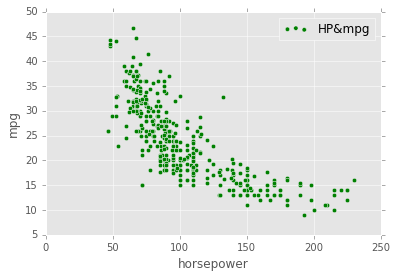

In [11]:
# check for shape of association between horsepower and MPG
clean_df[['horsepower', 'mpg']].plot( x='horsepower', y ='mpg', kind = 'scatter', color = 'green', label = 'HP&mpg')

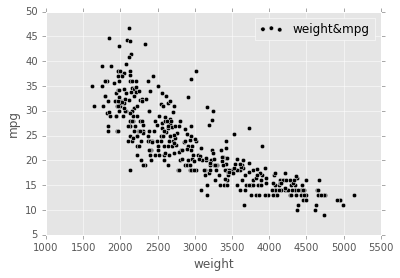

In [12]:
# check for shape of association between weight and MPG
clean_df[['weight', 'mpg']].plot( x='weight', y ='mpg', kind = 'scatter', color = 'black', label = 'weight&mpg')

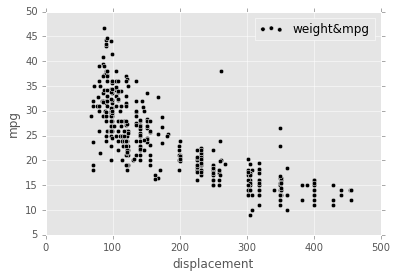

In [13]:
# check for shape of association between displacement and MPG
clean_df[['displacement', 'mpg']].plot( x='displacement', y ='mpg', kind = 'scatter', color = 'black', label = 'weight&mpg')

In [14]:
# try to linearize the relationship by taking thte square root so we can run a linear regression
clean_df[ ['displacement_sqrt', 'horsepower_sqrt', 'weight_sqrt'] ] = clean_df[ ['displacement', 'horsepower', 'weight'] ].apply(np.sqrt)

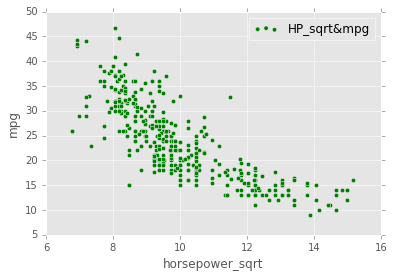

In [15]:
# check for success of linearization w/r/t horsepower
clean_df[['horsepower_sqrt', 'mpg']].plot( x='horsepower_sqrt', y ='mpg', kind = 'scatter', color = 'green', label = 'HP_sqrt&mpg')

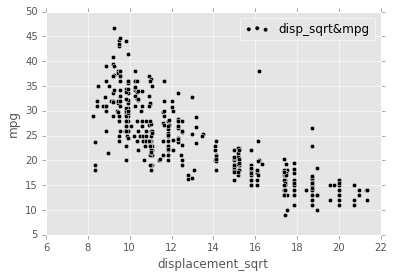

In [16]:
# check for success of linearization w/r/t displacement
clean_df[['displacement_sqrt', 'mpg']].plot( x='displacement_sqrt', y ='mpg', kind = 'scatter', color = 'black', label = 'disp_sqrt&mpg')

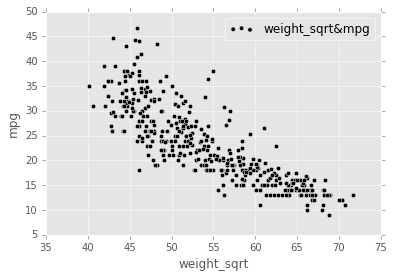

In [17]:
# check for success of linearization w/r/t displacement
clean_df[['weight_sqrt', 'mpg']].plot( x='weight_sqrt', y ='mpg', kind = 'scatter', color = 'black', label = 'weight_sqrt&mpg')

In [18]:
# try to linearize the relationship by taking the log
clean_df[ ['displacement_log', 'horsepower_log', 'weight_log'] ] = clean_df[ ['displacement', 'horsepower', 'weight'] ].apply(np.log)

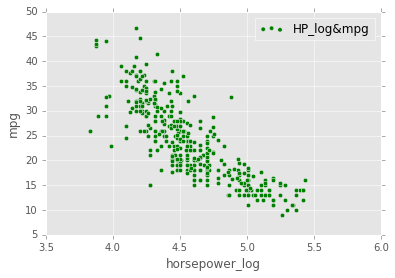

In [19]:
# check for success of linearization w/r/t horsepower
clean_df[['horsepower_log', 'mpg']].plot( x='horsepower_log', y ='mpg', kind = 'scatter', color = 'green', label = 'HP_log&mpg')

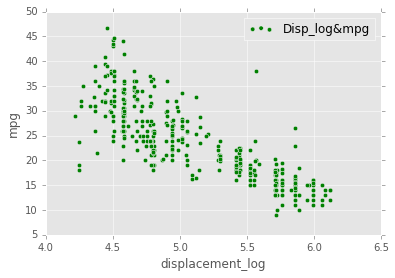

In [20]:
# check for success of linearization w/r/t displacement
clean_df[['displacement_log', 'mpg']].plot( x='displacement_log', y ='mpg', kind = 'scatter', color = 'green', label = 'Disp_log&mpg')

In [21]:
# try to linearize the relationship by taking the inverse
clean_df[ ['displacement_inv', 'horsepower_inv', 'weight_inv'] ] = clean_df[ ['displacement', 'horsepower', 'weight'] ].apply(lambda x: 1. / x)

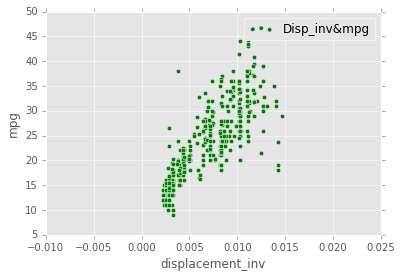

In [22]:
# check for success of inversion w/r/t displacement
clean_df[['displacement_inv', 'mpg']].plot( x='displacement_inv', y ='mpg', kind = 'scatter', color = 'green', label = 'Disp_inv&mpg')

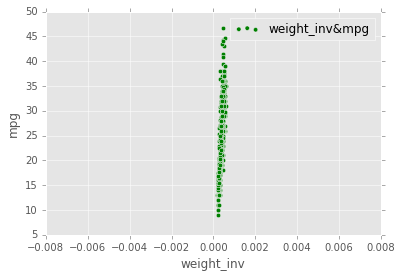

In [23]:
# check for success of inversion w/r/t weight
clean_df[['weight_inv', 'mpg']].plot( x='weight_inv', y ='mpg', kind = 'scatter', color = 'green', label = 'weight_inv&mpg')

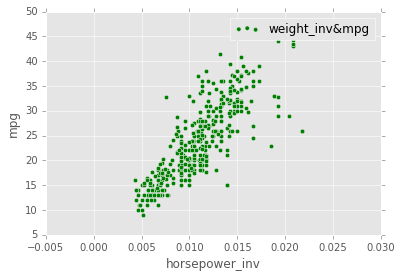

In [24]:
# check for success of inversion w/r/t horsepower
clean_df[['horsepower_inv', 'mpg']].plot( x='horsepower_inv', y ='mpg', kind = 'scatter', color = 'green', label = 'weight_inv&mpg')

In [25]:
# try inverting miles per gallon to gallons per mile
clean_df['gpm'] = 1. / df.mpg

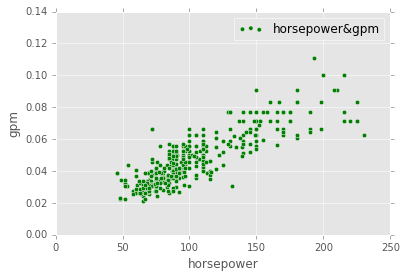

In [26]:
# check for success of inversion w/r/t mpg
clean_df[['horsepower', 'gpm']].plot( x='horsepower', y ='gpm', kind = 'scatter', color = 'green', label = 'horsepower&gpm')

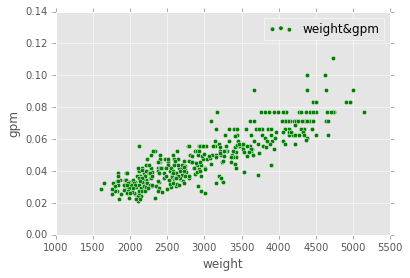

In [27]:
# check for success of weight w/r/t gpm
clean_df[['weight', 'gpm']].plot( x='weight', y ='gpm', kind = 'scatter', color = 'green', label = 'weight&gpm')

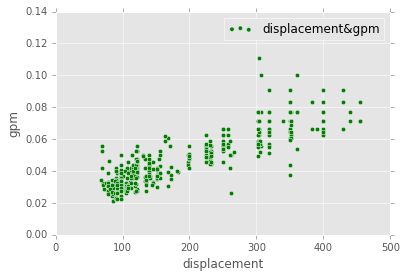

In [28]:
# check for success of displacement w/r/t gpm
clean_df[['displacement', 'gpm']].plot( x='displacement', y ='gpm', kind = 'scatter', color = 'green', label = 'displacement&gpm')

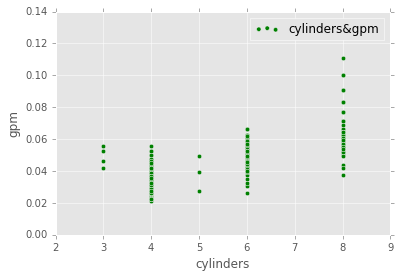

In [29]:
# check for success of cylinders w/r/t gpm
clean_df[['cylinders', 'gpm']].plot( x='cylinders', y ='gpm', kind = 'scatter', color = 'green', label = 'cylinders&gpm')

In [30]:
# assess dispersion of values for cylinders column
clean_df['cylinders'].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

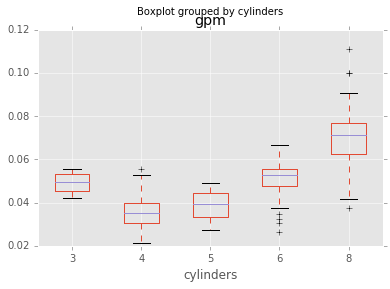

In [31]:
# create box plot of cylinders
clean_df.boxplot(column = 'gpm', by = 'cylinders')

In [32]:
# find vars that correlate with cylinders
df.corr().cylinders

mpg            -0.775396
cylinders       1.000000
displacement    0.950721
horsepower      0.842983
weight          0.896017
acceleration   -0.505419
model_year     -0.348746
origin         -0.562543
Name: cylinders, dtype: float64

In [33]:
# if you look up the definition of displacement, it includes the number of cylinders
# so, we should drop the cylinders var
clean_df = clean_df.drop('cylinders', axis = 1)

In [34]:
clean_df.head()

,mpg,displacement,horsepower,weight,acceleration,...,weight_log,displacement_inv,horsepower_inv,weight_inv,gpm
0,18.0,307.0,130.0,3504.0,12.0,...,8.161660,0.003257,0.007692,0.000285,0.055556
1,15.0,350.0,165.0,3693.0,11.5,...,8.214194,0.002857,0.006061,0.000271,0.066667
2,18.0,318.0,150.0,3436.0,11.0,...,8.142063,0.003145,0.006667,0.000291,0.055556
3,16.0,304.0,150.0,3433.0,12.0,...,8.141190,0.003289,0.006667,0.000291,0.062500
4,17.0,302.0,140.0,3449.0,10.5,...,8.145840,0.003311,0.007143,0.000290,0.058824


In [35]:
clean_df.corr()

,mpg,displacement,horsepower,weight,acceleration,...,weight_log,displacement_inv,horsepower_inv,weight_inv,gpm
mpg,1.000000,-0.805127,-0.778427,-0.832244,0.423329,...,-0.844194,0.812885,0.816767,0.840681,-0.935935
displacement,-0.805127,1.000000,0.897257,0.932994,-0.543800,...,0.919419,-0.920530,-0.831923,-0.888429,0.866050
horsepower,-0.778427,0.897257,1.000000,0.864538,-0.689196,...,0.845609,-0.788993,-0.920325,-0.814147,0.854809
weight,-0.832244,0.932994,0.864538,1.000000,-0.416839,...,0.991488,-0.901711,-0.843741,-0.966373,0.885056
acceleration,0.423329,-0.543800,-0.689196,-0.416839,1.000000,...,-0.401563,0.444941,0.683397,0.382099,-0.456338
...,...,...,...,...,...,...,...,...,...,...,...
weight_log,-0.844194,0.919419,0.845609,0.991488,-0.401563,...,1.000000,-0.927955,-0.858381,-0.991474,0.869743
displacement_inv,0.812885,-0.920530,-0.788993,-0.901711,0.444941,...,-0.927955,1.000000,0.832701,0.936413,-0.804912
horsepower_inv,0.816767,-0.831923,-0.920325,-0.843741,0.683397,...,-0.858381,0.832701,1.000000,0.860292,-0.810579
weight_inv,0.840681,-0.888429,-0.814147,-0.966373,0.382099,...,-0.991474,0.936413,0.860292,1.000000,-0.839745


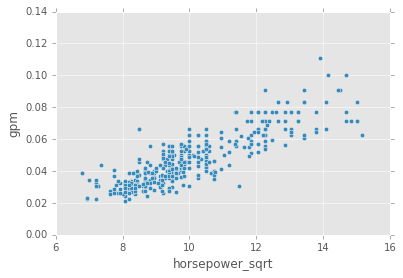

In [36]:
clean_df.plot('horsepower_sqrt', 'gpm', kind = 'scatter')

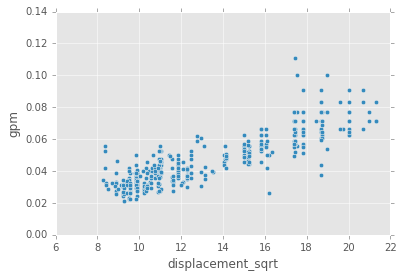

In [37]:
clean_df.plot('displacement_sqrt', 'gpm', kind = 'scatter')

In [38]:
clean_df [['gpm', 'displacement_sqrt', 'horsepower_sqrt', 'weight']].corr()

,gpm,displacement_sqrt,horsepower_sqrt,weight
gpm,1.000000,0.865431,0.859499,0.885056
displacement_sqrt,0.865431,1.000000,0.886470,0.939424
horsepower_sqrt,0.859499,0.886470,1.000000,0.875859
weight,0.885056,0.939424,0.875859,1.000000


In [39]:
# running an initial regression with scikitlearn's linear_model class
X = clean_df[ ['displacement_sqrt', 'horsepower_sqrt', 'weight'] ]
y = clean_df.gpm

model = linear_model.LinearRegression()
model.fit(X,y)

print(model.intercept_)
print(model.coef_)

-0.0186810632848
[  4.98908451e-04   3.09250758e-03   9.62712330e-06]


In [40]:
# initial regression equation:
# GPM = -0.0186810632848 + 4.98908451e-04*displacement_sqrt + 3.09250758e-03*horsepower_sqrt + 9.62712330e-06*weight

In [41]:
# initial regression with statsmodel

In [42]:
model_2 = smf.ols(formula = 'gpm ~ weight + horsepower + model_year', data = clean_df).fit().summary()
model_2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     956.8
Date:                Sun, 12 Jun 2016   Prob (F-statistic):          7.61e-179
Time:                        11:47:27   Log-Likelihood:                 1467.0
No. Observations:                 392   AIC:                            -2926.
Df Residuals:                     388   BIC:                            -2910.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0997      0.007     14.192      0.000         0.086     0.114
weight      1.245e-05   6.87e-07     18.113      0.000      1.11e-05  1.38e-05
horsepower  8.099e-05   1.59e-05      5.106      0.000      4.98e-05     0.000
model_year    -0.0013   8.76e-05    -14.640      0.000        -0.001    -0.001
==============================================================================
Omnibus:                       64.559   Durbin-Watson:                   1.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.012
Skew:                           0.803   Prob(JB):                     1.47e-36
Kurtosis:                       5.743   Cond. No.                     7.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
model_3 = smf.ols(formula = 'gpm ~ horsepower + weight', data = clean_df).fit().summary()
model_3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gpm   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     857.7
Date:                Sun, 12 Jun 2016   Prob (F-statistic):          2.52e-143
Time:                        11:47:28   Log-Likelihood:                 1380.8
No. Observations:                 392   AIC:                            -2756.
Df Residuals:                     389   BIC:                            -2744.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0019      0.001     -1.441      0.150        -0.005     0.001
horsepower     0.0002   1.88e-05      8.182      0.000         0.000     0.000
weight      1.133e-05    8.5e-07     13.330      0.000      9.66e-06   1.3e-05
==============================================================================
Omnibus:                       21.179   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.827
Skew:                           0.389   Prob(JB):                     7.44e-08
Kurtosis:                       4.185   Cond. No.                     1.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# running an initial regression with scikitlearn's linear_model class
X = clean_df[ ['horsepower', 'weight'] ]
y = clean_df.gpm

model = linear_model.LinearRegression()
model.fit(X,y)

print(model.intercept_)
print(model.coef_)

-0.00193323656128
[  1.53430105e-04   1.13269393e-05]


In [45]:
# evaluate predictive accuray!
# load dataset
df = pd.read_csv(os.path.join('datasets', 'auto-mpg.csv'))

In [46]:
# define vars from practice data
df['gpm'] = 1. / df.mpg
df['horsepower_sqrt'] = np.sqrt(df.horsepower)
df = df.dropna(axis = 0, subset = ['gpm', 'displacement', 'horsepower_sqrt', 'weight'])

# create training dataframe with a random sample of 60% of the data
train_df = df.sample(frac = .6, random_state = 1)

# create test dataframe with remaining 40% of data
test_df = df.drop(train_df.index)

In [47]:
# define X (matrix of IVs and their values) and y (series of values for the lone DV), adding 'cylinders' column for contrast
train_X = train_df[ ['cylinders', 'horsepower_sqrt', 'weight'] ]
train_y = train_df['gpm']

In [48]:
# run regression on training data
model = linear_model.LinearRegression()
model.fit(train_X, train_y)
print(model.score(train_X, train_y))

# train 9 times with 10% of data apiece, then test with remaining 10%
print(cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean())

0.812602532292
0.787735316391


In [49]:
# define X (matrix of IVs and their values) and y (series of values for the lone DV) without 'cylinders'
train_X = train_df[ ['horsepower_sqrt', 'weight'] ]
train_y = train_df['gpm']


# regress with training data, returning the mean r-square value for the ten iterations
model = linear_model.LinearRegression()
cross_validation.cross_val_score(model, train_X, train_y, cv = 10).mean()

0.78921906858910851

In [50]:
# regress with test data
# define X (matrix of IVs and their values) and y (series of values for the lone DV) without 'cylinders'
test_X = test_df[ ['horsepower_sqrt', 'weight'] ]
test_y = test_df['gpm']

model.fit(test_X, test_y)
model.score(test_X, test_y)

0.82282796871883224